#Importing libraries

In [ ]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

#Fetch Images count from Fodlers

In [ ]:

base_dir = '/content/drive/MyDrive/dataset'
total_image_count = 0  # Initialize total image count

if os.path.exists(base_dir):
    dirs = os.listdir(base_dir)
    for dir_name in dirs:
        dir_path = os.path.join(base_dir, dir_name)
        if os.path.isdir(dir_path):
            files = os.listdir(dir_path)
            image_count = len(files)
            print(f'{dir_name} Folder has {image_count} Images')
            total_image_count += image_count  # Increment total image count
        else:
            print(f'{dir_name} is not a directory')

    print(f'Total Image Count: {total_image_count}')
else:
    print(f'The base directory {base_dir} does not exist.')


strawberry Folder has 986 Images
mango Folder has 934 Images
grape Folder has 975 Images
orange Folder has 980 Images
apple Folder has 955 Images
Total Image Count: 4830


#Load Images into Arrays as Dataset

In [ ]:
base_dir = '/content/drive/MyDrive/dataset'
img_size = 180
batch = 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4829 files belonging to 5 classes.
Using 3864 files for training.
Found 4829 files belonging to 5 classes.
Using 965 files for validation.


In [ ]:
fruits_names = train_ds.class_names
fruits_names

['apple', 'grape', 'mango', 'orange', 'strawberry']

In [ ]:
import matplotlib.pyplot as plt

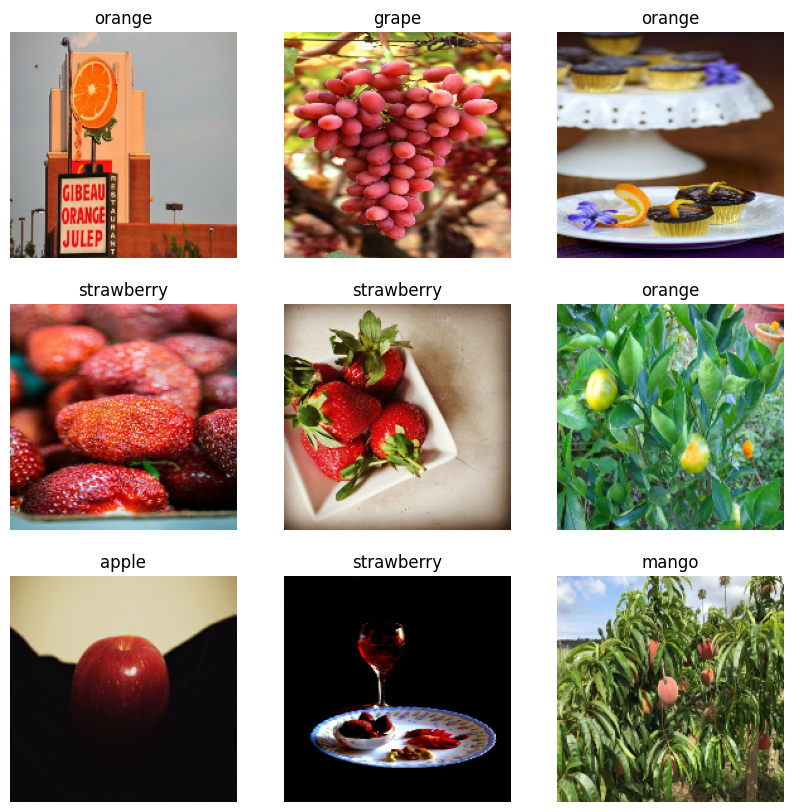

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(fruits_names[labels[i]])
        plt.axis('off')

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [ ]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

#Data Augmentation

In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

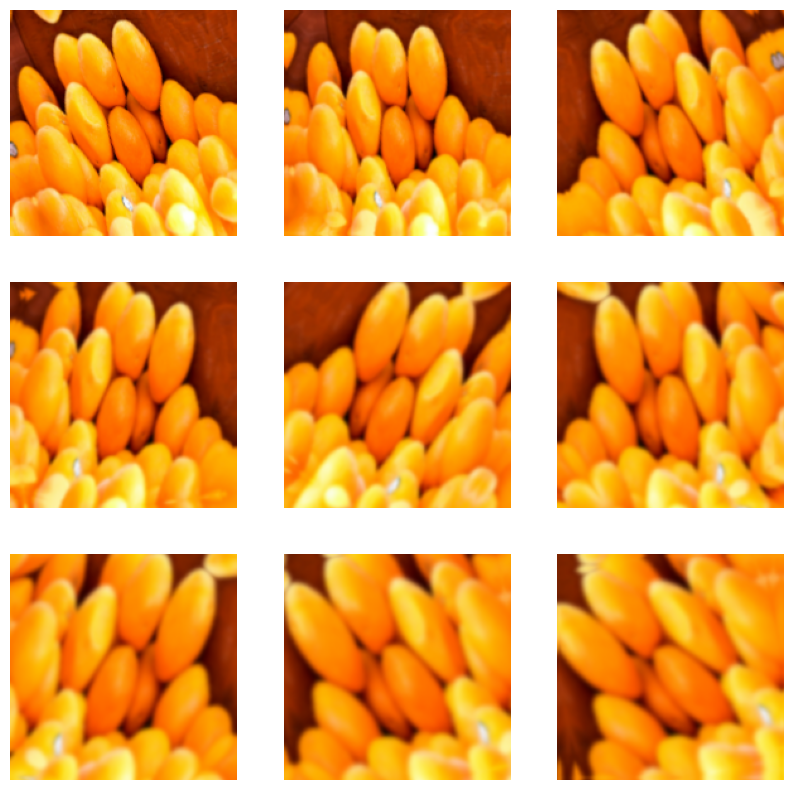

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

#MOdel Creation

In [ ]:
# Change the number of classes
num_classes = len(fruits_names)

from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(32, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.3),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Adjust learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 180, 180, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 90, 90, 64)      

In [ ]:
history = model.fit(train_ds, epochs=100, validation_data=val_ds)



Epoch 1/100
121/121 [==============================] - 19s 128ms/step - loss: 2.4895 - accuracy: 0.4037 - val_loss: 3.8790 - val_accuracy: 0.1865
Epoch 2/100
121/121 [==============================] - 12s 102ms/step - loss: 1.5014 - accuracy: 0.4801 - val_loss: 1.8675 - val_accuracy: 0.3689
Epoch 3/100
121/121 [==============================] - 12s 102ms/step - loss: 1.2995 - accuracy: 0.5067 - val_loss: 1.6446 - val_accuracy: 0.4311
Epoch 4/100
121/121 [==============================] - 12s 101ms/step - loss: 1.1796 - accuracy: 0.5355 - val_loss: 1.3996 - val_accuracy: 0.4725
Epoch 5/100
121/121 [==============================] - 12s 100ms/step - loss: 1.1092 - accuracy: 0.5616 - val_loss: 1.1116 - val_accuracy: 0.5358
Epoch 6/100
121/121 [==============================] - 12s 101ms/step - loss: 1.0917 - accuracy: 0.5650 - val_loss: 1.0554 - val_accuracy: 0.5927
Epoch 7/100
121/121 [==============================] - 12s 101ms/step - loss: 1.0464 - accuracy: 0.5844 - val_loss: 1.0423 -

In [ ]:
def classify_images(image_path):
    # Load the image from the given path
    input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    # Assuming 'model' and 'fruits_names' are defined elsewhere in your code
    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + fruits_names[np.argmax(result)] + ' with a score of ' + str(np.max(result) * 100)
    return outcome

In [ ]:
classify_images('/content/drive/MyDrive/sample dataset /th (6).jpg')


1/1 [==============================] - 0s 111ms/step


'The Image belongs to mango with a score of 40.44249355792999'

In [ ]:
model.save('Fruits_Recog_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Confusion matrix

31/31 [==============================] - 1s 15ms/step


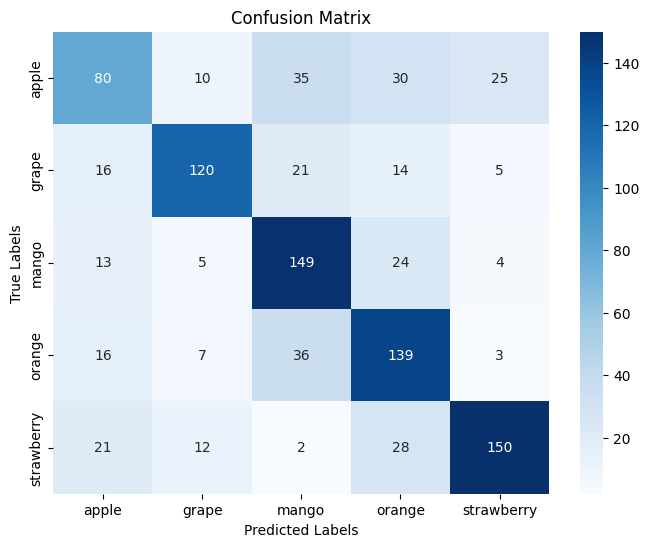

Classification Report:
              precision    recall  f1-score   support

       apple       0.55      0.44      0.49       180
       grape       0.78      0.68      0.73       176
       mango       0.61      0.76      0.68       195
      orange       0.59      0.69      0.64       201
  strawberry       0.80      0.70      0.75       213

    accuracy                           0.66       965
   macro avg       0.67      0.66      0.66       965
weighted avg       0.67      0.66      0.66       965



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get the true labels from the validation dataset
true_labels = []
for images, labels in val_ds:
    true_labels.extend(labels.numpy())

# Get the predicted labels from the model
predicted_scores = model.predict(val_ds)
predicted_labels = np.argmax(predicted_scores, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=fruits_names, yticklabels=fruits_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=fruits_names)
print("Classification Report:")
print(class_report)